In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_evaluation.csv')

In [4]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [5]:
df.columns=['Buying_Price','Maint_cost','No_of_doors','No_of_Persons','Lug_Boot','Safety','Target']

In [6]:
df.columns

Index(['Buying_Price', 'Maint_cost', 'No_of_doors', 'No_of_Persons',
       'Lug_Boot', 'Safety', 'Target'],
      dtype='object')

In [ ]:
#now understanding the dataset

In [7]:
df.shape

(1727, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Buying_Price   1727 non-null   object
 1   Maint_cost     1727 non-null   object
 2   No_of_doors    1727 non-null   object
 3   No_of_Persons  1727 non-null   object
 4   Lug_Boot       1727 non-null   object
 5   Safety         1727 non-null   object
 6   Target         1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#no missing values

In [10]:
df.describe()

,Buying_Price,Maint_cost,No_of_doors,No_of_Persons,Lug_Boot,Safety,Target
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
#exploratory data analysis

In [ ]:
#univariate analysis

In [11]:
df['Buying_Price'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: Buying_Price, dtype: int64

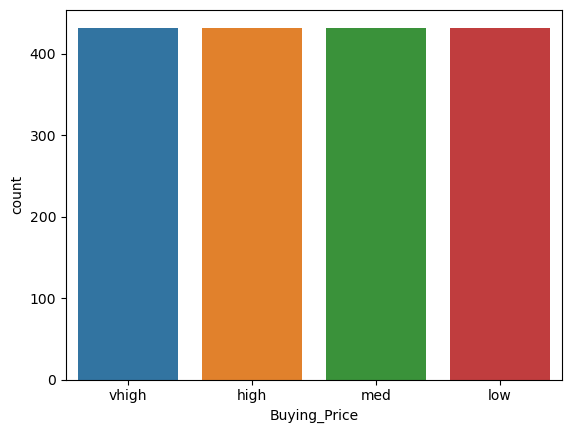

In [12]:
sns.countplot(x=df['Buying_Price'])
plt.show()

<Axes: xlabel='Maint_cost', ylabel='count'>

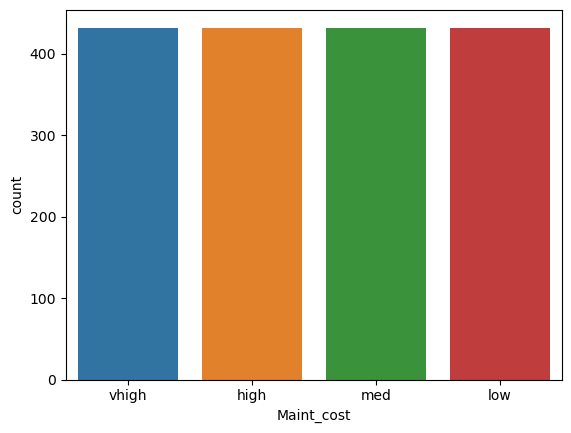

In [13]:
sns.countplot(x=df['Maint_cost'])

<Axes: xlabel='No_of_doors', ylabel='count'>

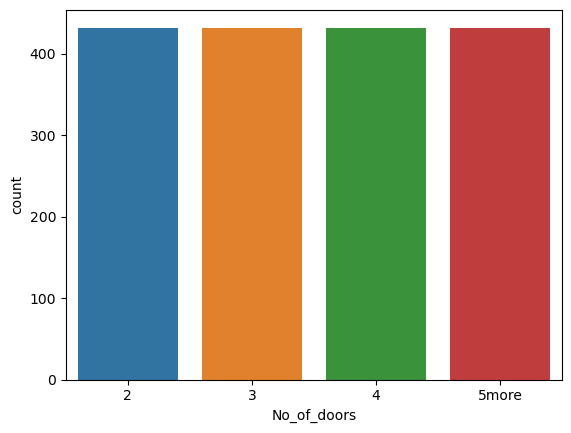

In [14]:
sns.countplot(x=df['No_of_doors'])

<Axes: xlabel='No_of_Persons', ylabel='count'>

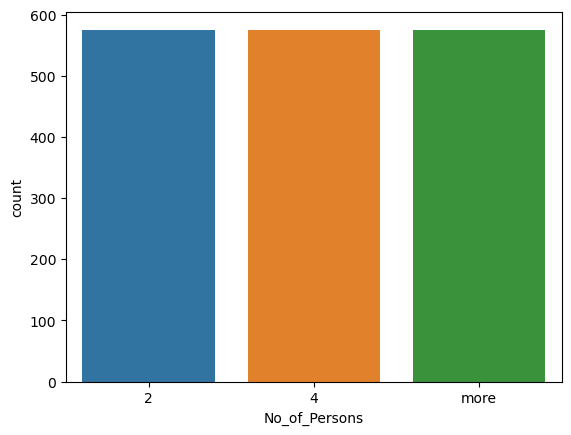

In [15]:
sns.countplot(x=df['No_of_Persons'])

<Axes: xlabel='Lug_Boot', ylabel='count'>

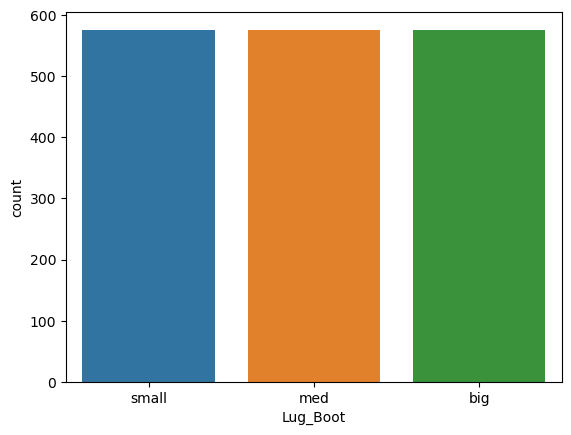

In [16]:
sns.countplot(x=df['Lug_Boot'])

<Axes: xlabel='Safety', ylabel='count'>

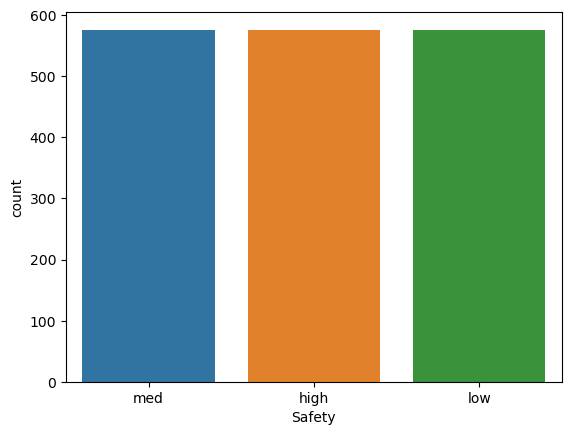

In [17]:
sns.countplot(x=df['Safety'])

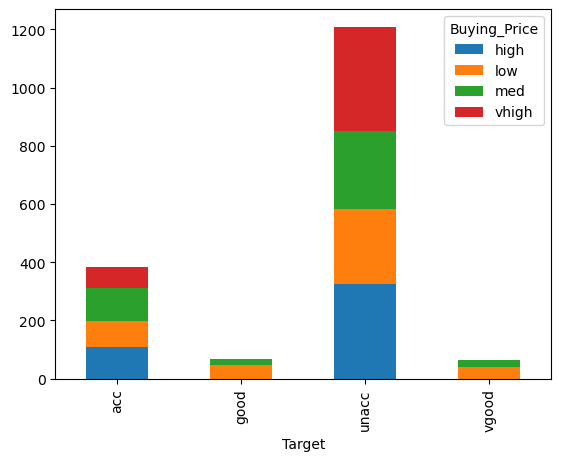

In [18]:
data_target=df.groupby(['Target','Buying_Price'])['Buying_Price'].count()
data_target.unstack().plot(kind='bar',stacked=True)
plt.show()

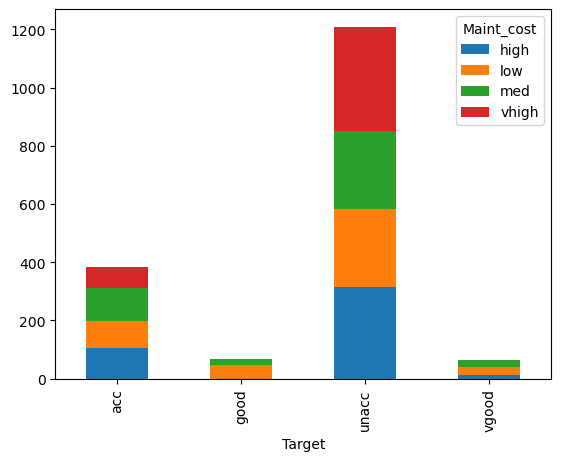

In [19]:
data_main=df.groupby(['Target','Maint_cost'])['Maint_cost'].count()
data_main.unstack().plot(kind='bar',stacked=True)
plt.show()

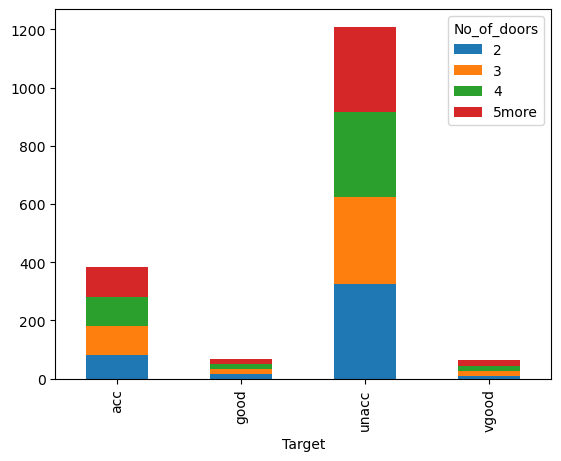

In [20]:
data_door=df.groupby(['Target','No_of_doors'])['No_of_doors'].count()
data_door.unstack().plot(kind='bar',stacked=True)
plt.show()

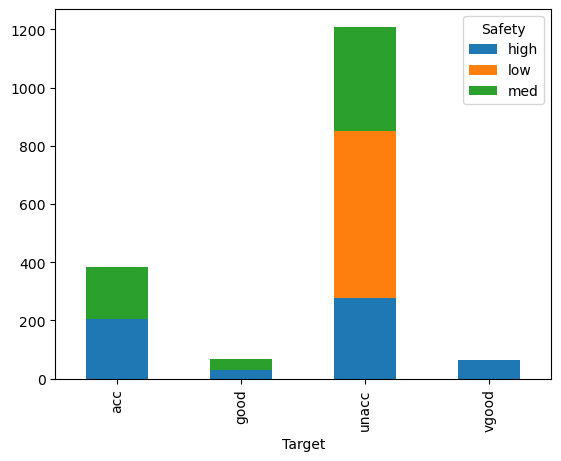

In [21]:
data_safety=df.groupby(['Target','Safety'])['Safety'].count()
data_safety.unstack().plot(kind='bar',stacked='True')
plt.show()

In [ ]:
#most of them are categorical in nature
#we need to perform categorical encoding

In [22]:
df

,Buying_Price,Maint_cost,No_of_doors,No_of_Persons,Lug_Boot,Safety,Target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
#now seperate the target and feature

In [23]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1].values

In [24]:
X

,Buying_Price,Maint_cost,No_of_doors,No_of_Persons,Lug_Boot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [25]:
Y

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

In [ ]:
#now we are going to do feature engineering on independent data
#categorical encoding

In [26]:
X_new=pd.get_dummies(X,drop_first=True)

In [27]:
X_new

,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maint_cost_low,Maint_cost_med,Maint_cost_vhigh,No_of_doors_3,No_of_doors_4,No_of_doors_5more,No_of_Persons_4,No_of_Persons_more,Lug_Boot_med,Lug_Boot_small,Safety_low,Safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1724,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [28]:
#label encoding
#aur yai 0 position buying price ki hai
X.iloc[:,0]

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1722      low
1723      low
1724      low
1725      low
1726      low
Name: Buying_Price, Length: 1727, dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.iloc[:,0]=le.fit_transform(X.iloc[:,0])

C:\Users\shiva\AppData\Local\Temp\ipykernel_32408\3067477831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[:,0]=le.fit_transform(X.iloc[:,0])
C:\Users\shiva\AppData\Local\Temp\ipykernel_32408\3067477831.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,0]=le.fit_transform(X.iloc[:,0])


In [31]:
X.iloc[:,1]=le.fit_transform(X.iloc[:,1])
X.iloc[:,2]=le.fit_transform(X.iloc[:,2])
X.iloc[:,3]=le.fit_transform(X.iloc[:,3])
X.iloc[:,4]=le.fit_transform(X.iloc[:,4])
X.iloc[:,5]=le.fit_transform(X.iloc[:,5])

C:\Users\shiva\AppData\Local\Temp\ipykernel_32408\2247343573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[:,1]=le.fit_transform(X.iloc[:,1])
C:\Users\shiva\AppData\Local\Temp\ipykernel_32408\2247343573.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,1]=le.fit_transform(X.iloc[:,1])
C:\Users\shiva\AppData\Local\Temp\ipykernel_32408\2247343573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [33]:
X

,Buying_Price,Maint_cost,No_of_doors,No_of_Persons,Lug_Boot,Safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [34]:
X_new

,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maint_cost_low,Maint_cost_med,Maint_cost_vhigh,No_of_doors_3,No_of_doors_4,No_of_doors_5more,No_of_Persons_4,No_of_Persons_more,Lug_Boot_med,Lug_Boot_small,Safety_low,Safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1724,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
#train and test split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.3)

In [36]:
X_N_train,X_N_test,Y_N_train,Y_N_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
#building the model

In [37]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
y_predict=dc.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

         acc       0.87      0.88      0.88       108
        good       0.54      0.54      0.54        26
       unacc       0.98      0.99      0.98       360
       vgood       0.80      0.64      0.71        25

    accuracy                           0.93       519
   macro avg       0.80      0.76      0.78       519
weighted avg       0.93      0.93      0.93       519



In [42]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,X_train,Y_train,cv=5).mean())
print(cross_val_score(dc,X_test,Y_test,cv=5).mean())

0.8873941222866157
0.8592793129200895


[Text(0.6282980913173652, 0.9666666666666667, 'x[13] <= 0.5\ngini = 0.451\nsamples = 1208\nvalue = [276, 43, 849, 40]'),
 Text(0.6223100673652695, 0.9, 'x[9] <= 0.5\ngini = 0.573\nsamples = 796\nvalue = [276, 43, 437, 40]'),
 Text(0.3534805389221557, 0.8333333333333334, 'x[10] <= 0.5\ngini = 0.49\nsamples = 532\nvalue = [135, 22, 354, 21]'),
 Text(0.3474925149700599, 0.7666666666666667, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.3594685628742515, 0.7666666666666667, 'x[12] <= 0.5\ngini = 0.619\nsamples = 263\nvalue = [135, 22, 85, 21]'),
 Text(0.2314745508982036, 0.7, 'x[2] <= 0.5\ngini = 0.601\nsamples = 179\nvalue = [103, 17, 38, 21]'),
 Text(0.16953592814371257, 0.6333333333333333, 'x[0] <= 0.5\ngini = 0.572\nsamples = 132\nvalue = [81, 17, 13, 21]'),
 Text(0.10853293413173652, 0.5666666666666667, 'x[5] <= 0.5\ngini = 0.468\nsamples = 89\nvalue = [63, 7, 12, 7]'),
 Text(0.05538922155688623, 0.5, 'x[1] <= 0.5\ngini = 0.41\nsamples = 69\nvalue = [52, 7, 3, 7]'),
 Te

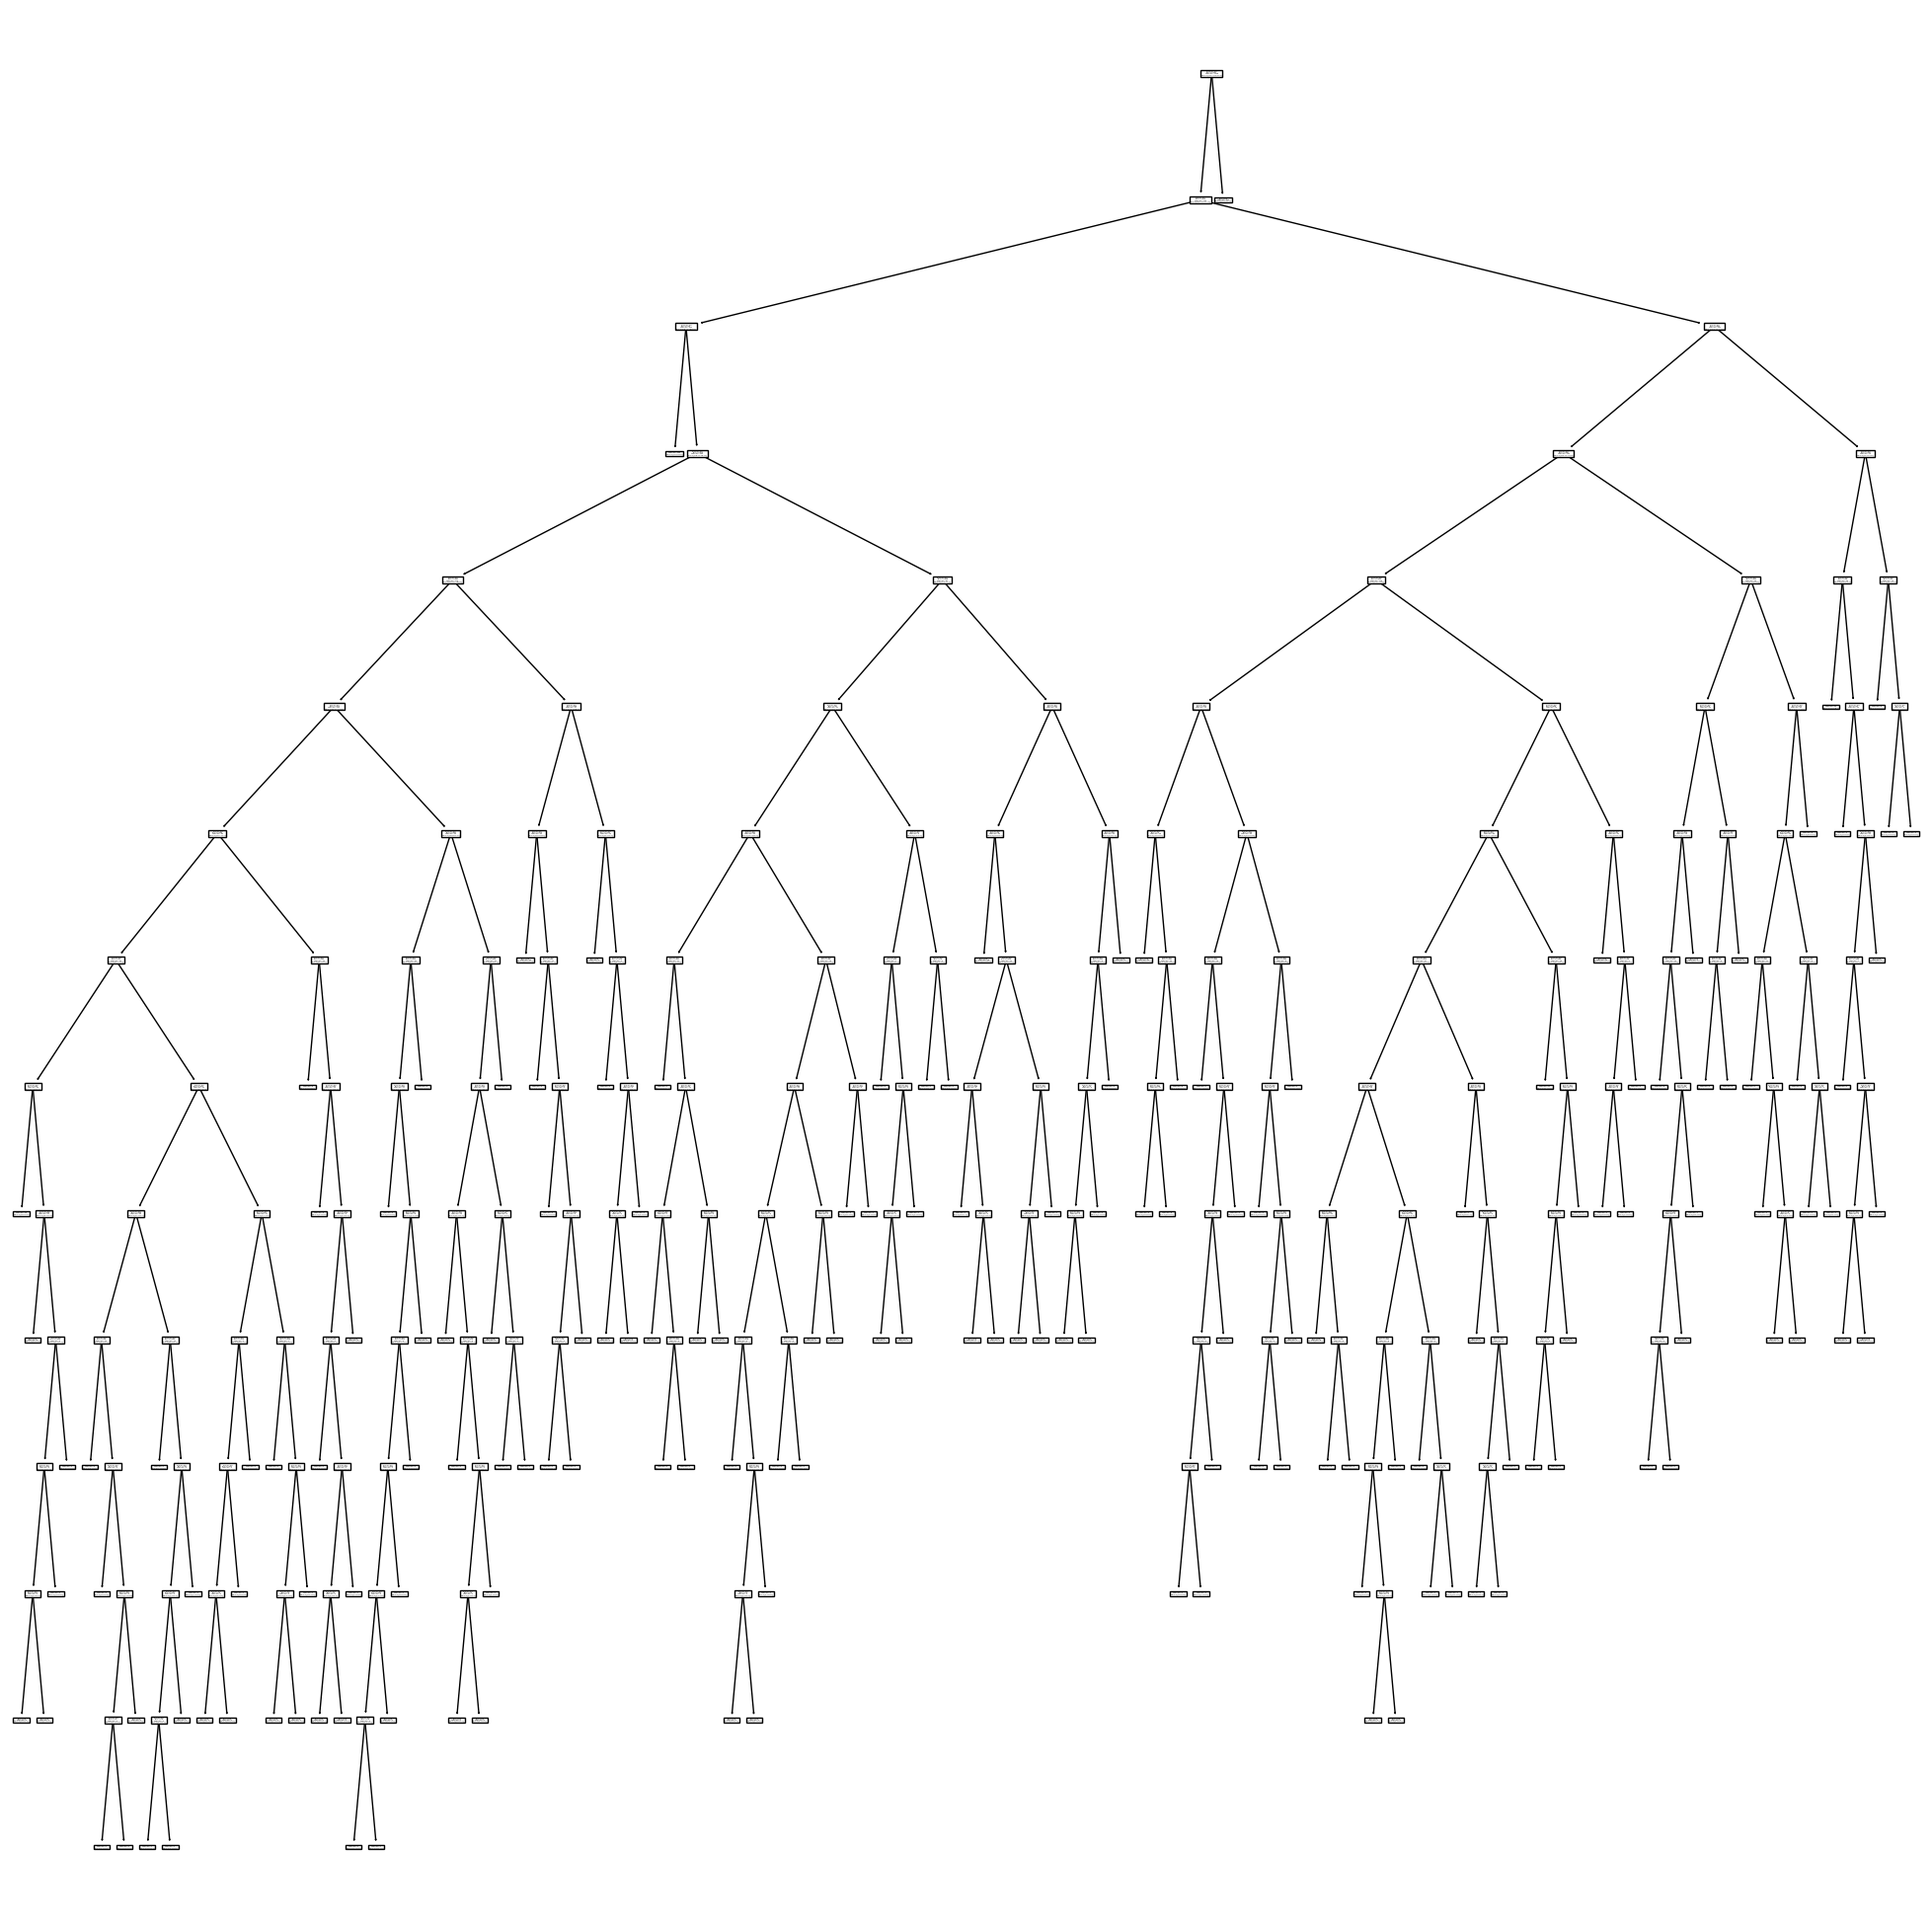

In [43]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(dc)

In [44]:
dc.fit(X_N_train,Y_train)

DecisionTreeClassifier()

In [46]:
Y_P=dc.predict(X_N_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_P))

              precision    recall  f1-score   support

         acc       0.21      0.22      0.22       108
        good       0.08      0.08      0.08        26
       unacc       0.71      0.71      0.71       360
       vgood       0.05      0.04      0.05        25

    accuracy                           0.54       519
   macro avg       0.26      0.26      0.26       519
weighted avg       0.54      0.54      0.54       519



In [48]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,X_N_train,Y_train,cv=5).mean())
print(cross_val_score(dc,X_N_train,Y_train,cv=5).mean())

0.5248311100442371
0.5248379685195982
